In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datetime

import numpyro
from numpyro.diagnostics import hpdi
import jax.numpy as jnp
import numpy as np

import matplotlib.pyplot as plt

# add mecha-fil path here, because it is different than the module's relative path
import sys
sys.path.append('../../filecoin-mecha-twin')

import scenario_generator.utils as u
import scenario_generator.mcmc_forecast as mcmc

In [2]:
numpyro.set_host_device_count(2)

# today = datetime.datetime.now().date()
# today = datetime.date(2022,11,1)
today = datetime.date(2022,12,1)
DATA_LAG_DAYS = 0
train_len_days = 180
train_start_date = today - datetime.timedelta(days=(DATA_LAG_DAYS + train_len_days))
train_end_date = train_start_date + datetime.timedelta(days=train_len_days)

print(train_start_date, train_end_date)

2022-06-04 2022-12-01


In [3]:
num_warmup_mcmc = 2000
num_samples_mcmc = 500
seasonality_mcmc = 2000
num_chains_mcmc = 2

# forecast_length = 365*3
end_date = datetime.date(2023,12,31)
forecast_length = int((end_date-today).days)

In [4]:
forecast_date_vec, rb_onboard_power_pred, x_train, y_train = \
    mcmc.forecast_rb_onboard_power(train_start_date, 
                                   train_end_date,
                                   forecast_length,
                                   num_warmup_mcmc = num_warmup_mcmc,
                                   num_samples_mcmc = num_samples_mcmc,
                                   seasonality_mcmc = seasonality_mcmc,
                                   num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     -0.09      0.08     -0.06     -0.20     -0.00    143.73      1.05
       init_s[0]     -2.43     48.48      0.48    -33.46     26.76    216.48      1.01
       init_s[1]     -0.12      0.62     -0.03     -1.10      0.77    221.62      1.01
       init_s[2]      1.58      0.70      1.67      0.40      2.55    198.89      1.02
       init_s[3]      0.56      0.71      0.61     -0.52      1.78    149.19      1.02
       init_s[4]      0.13      0.78      0.20     -1.21      1.27    185.47      1.01
       init_s[5]      0.46      0.76      0.52     -0.68      1.74    183.18      1.01
       init_s[6]     -0.14      0.81     -0.05     -1.51      1.20    202.11      1.01
       init_s[7]     -0.42      0.88     -0.35     -1.91      0.96    117.83      1.02
       init_s[8]     -0.81      0.91     -0.74     -2.21      0.85    132.50      1.02
       init_s[9]     -0.19      0.97     -

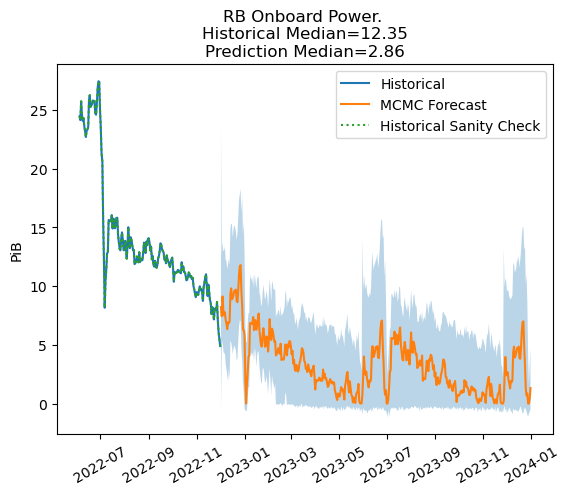

In [5]:
plt.figure()
y_pred_rb_onboard_power = jnp.median(rb_onboard_power_pred, axis=0)
hpd_low, hpd_high = hpdi(rb_onboard_power_pred)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_rb_onboard_power, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)

# sanity checking utilities
t_vec, historical_rb_onboard_vec = u.get_historical_daily_onboarded_power(train_start_date, train_end_date)
plt.plot(t_vec, historical_rb_onboard_vec, linestyle=":", label='Historical Sanity Check')

plt.title('RB Onboard Power. \nHistorical Median=%0.02f\nPrediction Median=%0.02f' % 
          (np.median(historical_rb_onboard_vec),np.median(y_pred_rb_onboard_power)))
plt.ylabel('PiB')
plt.xticks(rotation=30)
plt.legend()

In [6]:
forecast_date_vec, renewal_rate_pred, x_train, y_train = \
    mcmc.forecast_renewal_rate(train_start_date, 
                               train_end_date,
                               forecast_length,
                               num_warmup_mcmc = num_warmup_mcmc,
                               num_samples_mcmc = num_samples_mcmc,
                               seasonality_mcmc = seasonality_mcmc,
                               num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.57      0.46      0.46      0.01      1.19    116.78      1.02
       init_s[0]      3.39     56.24      0.44    -23.84     47.43     88.64      1.01
       init_s[1]     -2.68      0.80     -2.70     -4.18     -1.62    657.91      1.00
       init_s[2]     -0.20      0.92     -0.22     -1.76      1.21    538.79      1.00
       init_s[3]      0.46      0.96      0.46     -1.02      2.01    575.88      1.00
       init_s[4]      8.86      1.01      8.89      7.13     10.35    315.10      1.01
       init_s[5]      1.55      0.97      1.54      0.09      3.17    433.89      1.00
       init_s[6]      0.32      1.01      0.32     -1.51      1.85    438.43      1.00
       init_s[7]     -0.63      1.00     -0.61     -2.19      1.09    443.95      1.00
       init_s[8]      4.09      1.11      4.08      2.20      5.74    345.16      1.00
       init_s[9]     -0.17      1.11     -

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.20      0.17      0.16     -0.01      0.42    136.92      1.00
       init_s[0]      0.27     15.52     -0.08    -17.20     15.63    689.82      1.00
       init_s[1]      1.02      0.57      1.00      0.18      2.02    657.37      1.00
       init_s[2]      1.22      0.62      1.20      0.27      2.29    696.34      1.01
       init_s[3]      8.58      0.77      8.54      7.29      9.65    444.47      1.01
       init_s[4]     -0.42      0.66     -0.45     -1.56      0.54    721.84      1.00
       init_s[5]      0.18      0.70      0.14     -0.86      1.39    699.42      1.00
       init_s[6]     -0.18      0.70     -0.20     -1.30      0.95    601.53      1.00
       init_s[7]      9.47      0.77      9.45      8.13     10.59    664.78      1.00
       init_s[8]     -0.05      0.74     -0.07     -1.20      1.12    555.65      1.00
       init_s[9]     -0.41      0.70     -

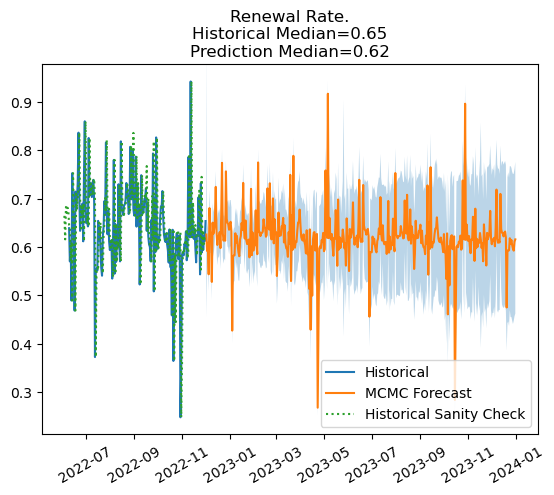

In [7]:
plt.figure()
y_pred_renewal_rate = jnp.median(renewal_rate_pred, axis=0)
hpd_low, hpd_high = hpdi(renewal_rate_pred)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_renewal_rate, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)

# sanity checking utilities
t_vec, historical_rr_vec = u.get_historical_renewal_rate(train_start_date, train_end_date)
plt.plot(t_vec, historical_rr_vec, linestyle=":", label='Historical Sanity Check')

plt.title('Renewal Rate.\nHistorical Median=%0.02f\nPrediction Median=%0.02f' % 
          (np.median(historical_rr_vec),np.median(y_pred_renewal_rate)))
plt.xticks(rotation=30)
plt.legend()

In [8]:
forecast_date_vec, filplus_rate_pred, x_train, y_train = \
    mcmc.forecast_filplus_rate(train_start_date, 
                               train_end_date,
                               forecast_length,
                               num_warmup_mcmc = num_warmup_mcmc,
                               num_samples_mcmc = num_samples_mcmc,
                               seasonality_mcmc = seasonality_mcmc,
                               num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.02      0.01      0.02      0.00      0.03    611.34      1.00
       init_s[0]     -0.05      1.26     -0.00     -1.37      1.48    599.88      1.00
       init_s[1]      0.04      0.07      0.05     -0.08      0.15   1190.84      1.00
       init_s[2]     -0.00      0.08      0.00     -0.13      0.14    898.95      1.00
       init_s[3]      0.01      0.09      0.01     -0.13      0.16    721.46      1.00
       init_s[4]      0.15      0.10      0.15     -0.01      0.32    619.21      1.00
       init_s[5]      0.13      0.11      0.14     -0.05      0.32    665.24      1.00
       init_s[6]      0.12      0.11      0.12     -0.06      0.31    562.89      1.00
       init_s[7]      0.15      0.12      0.15     -0.06      0.34    438.97      1.00
       init_s[8]      0.23      0.13      0.23      0.02      0.46    435.40      1.00
       init_s[9]      0.28      0.13      

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     -0.14      0.13     -0.10     -0.33     -0.00    304.37      1.00
       init_s[0]     -0.08     38.54     -0.18    -30.74     29.61    904.85      1.00
       init_s[1]     -0.23      0.60     -0.23     -1.20      0.74    564.72      1.00
       init_s[2]      1.48      0.72      1.49      0.36      2.65    731.73      1.00
       init_s[3]      0.38      0.79      0.40     -0.97      1.60    670.95      1.00
       init_s[4]     -0.16      0.83     -0.15     -1.62      1.07    530.89      1.00
       init_s[5]      0.18      0.92      0.14     -1.45      1.52    390.51      1.00
       init_s[6]     -0.43      0.93     -0.41     -1.94      1.02    398.44      1.00
       init_s[7]     -0.77      0.97     -0.76     -2.25      0.85    393.21      1.00
       init_s[8]     -1.23      0.99     -1.23     -2.76      0.49    393.02      1.00
       init_s[9]     -0.65      0.99     -

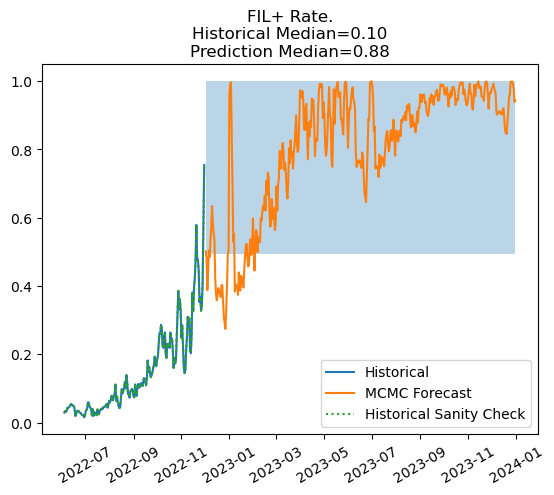

In [9]:
plt.figure()
y_pred_filplus = jnp.median(filplus_rate_pred, axis=0)
hpd_low, hpd_high = hpdi(y_pred_filplus)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_filplus, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)

# sanity checking utilities
t_vec, historical_fpr_vec = u.get_historical_filplus_rate(train_start_date, train_end_date)
plt.plot(t_vec, historical_fpr_vec, linestyle=":", label='Historical Sanity Check')

plt.title('FIL+ Rate.\nHistorical Median=%0.02f\nPrediction Median=%0.02f' % 
          (np.median(historical_fpr_vec),np.median(y_pred_filplus)))
plt.xticks(rotation=30)
plt.legend()